In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [3]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# data type of columns
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# distinct values for each column
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# missing values for each column
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


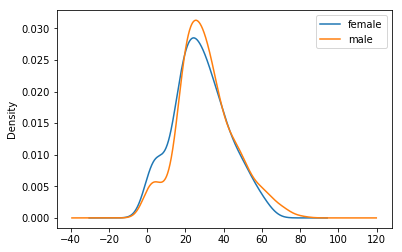

In [7]:
# analyze Age
print(df_titanic["Age"].groupby(df_titanic["Sex"]).describe())
df_titanic["Age"].groupby(df_titanic["Sex"]).plot.kde()
plt.legend()

In [8]:
# analyze Survived
df_titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# analyze Pclass
df_titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
# analyze Sex
df_titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# analyze SibSp
df_titanic["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
# analyze Parch
df_titanic["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
# analyze Ticket
df_titanic["Ticket"].value_counts().head()

CA. 2343    7
1601        7
347082      7
CA 2144     6
347088      6
Name: Ticket, dtype: int64

In [14]:
# analyze Fare
df_titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
# analyze Cabin
df_titanic["Cabin"].value_counts().head()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
Name: Cabin, dtype: int64

In [16]:
# analyze Embarked
df_titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# drop PassengerId, Name, Ticket, Cabin
# impute Age with mean, Embarked with most frequently value
# categorical data type: Survived, Pclass, Sex, Embarked
# numercal data type: SibSp, Parch, Fare, Age

In [62]:
class DropFeatures:
    def __init__(self, features_to_drop=None):
        self.features = features_to_drop
    
    def transform(self, df):
        return df.drop(columns=self.features)

drop_features = DropFeatures(["PassengerId", "Name", "Cabin", "Ticket", "Pclass", "Sex", "Embarked"])
drop_features.transform(df_titanic)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [28]:
class ImputeWithMean:
    def __init__(self, features_to_impute):
        self.features = features_to_impute
        self.means = dict()
    
    def fit(self, df):
        for feature in self.features:
            self.means[feature] = np.mean(df[feature])
    
    def transform(self, df):
        df = df.copy()
        for feature in self.features:
            df[feature].fillna(self.means[feature], inplace=True)
        return df
    

impute_with_mean = ImputeWithMean(["Age"])
impute_with_mean.fit(df_titanic)
impute_with_mean.transform(df_titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [29]:
class ImputeWithMostFrequentValue:
    def __init__(self, features_to_impute):
        self.features = features_to_impute
        self.values = dict()
    
    def fit(self, df):
        for feature in self.features:
            self.values[feature] = df[feature].value_counts().idxmax()
    
    def transform(self, df):
        df = df.copy()
        for feature in self.features:
            df[feature].fillna(self.values[feature], inplace=True)
        return df

impute_with_most_frequent = ImputeWithMostFrequentValue(["Embarked"])
impute_with_most_frequent.fit(df_titanic)
impute_with_most_frequent.transform(df_titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [64]:
df_titanic_prep = df_titanic
df_titanic_prep = impute_with_mean.transform(df_titanic_prep)
df_titanic_prep = impute_with_most_frequent.transform(df_titanic_prep)
df_titanic_prep = drop_features.transform(df_titanic_prep)

df_titanic_data = df_titanic_prep.drop("Survived", axis=1)
df_titanic_label = df_titanic_prep["Survived"]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(df_titanic_data, df_titanic_label, test_size=0.25, random_state=0)

In [70]:
logistic_regr = LogisticRegression(solver="lbfgs")
logistic_regr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
logistic_regr_pred = logistic_regr.predict(x_test)
logistic_regr.score(x_test, y_test)

0.726457399103139